In [1]:
# 경고 메세지가 안나오게..
import warnings
warnings.filterwarnings('ignore')

# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold
from sklearn.model_selection import KFold           # 랜덤하게 섞어서 자를 수도 있고, 순서대로 자를 수도 있음
from sklearn.model_selection import StratifiedKFold # 결과 데이터의 비율이 최대한 균등하게 들어갈 수 있도록!

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family']='Malgun Gothic'
# 맥용 plt.rcParams['font.family']='AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 붓꽃 데이터를 가져온다

df1 = pd.read_csv('../data/iris.csv', header=None)
df1.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


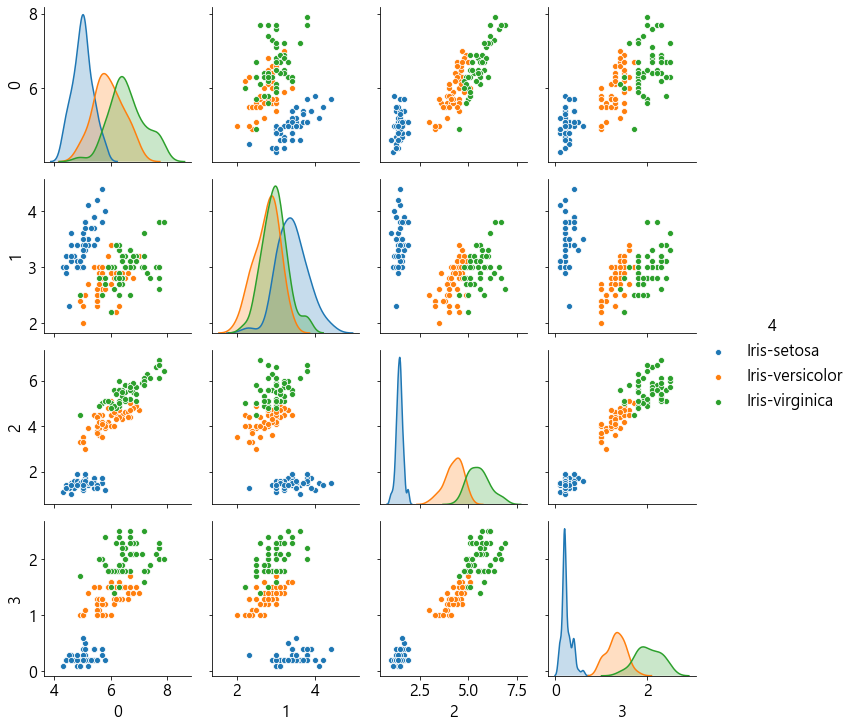

In [3]:
sns.pairplot(df1, hue=4)
plt.show()

In [4]:
# 2진 분류 테스트를 위해..
# df1 = df1[:100]
df1 = df1[50:]

# 입력과 결과로 나눈다

x1 = df1.drop(4, axis=1)
y1 = df1[4]

display(x1)
display(y1)

,0,1,2,3
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


50     Iris-versicolor
51     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
54     Iris-versicolor
            ...       
145     Iris-virginica
146     Iris-virginica
147     Iris-virginica
148     Iris-virginica
149     Iris-virginica
Name: 4, Length: 100, dtype: object

# 머신러닝

In [5]:
encoder1 = LabelEncoder()
encoder1.fit(y1)
y1 = encoder1.transform(y1)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, random_state=1)

In [7]:
model1 = LogisticRegression()
model1.fit(train_x1, train_y1)

LogisticRegression()

In [8]:
pred1 = model1.predict(test_x1)
pred1

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0])

In [9]:
r1 = accuracy_score(test_y1, pred1)
r1

0.88

# 딥러닝

In [10]:
model2 = Sequential()
model2.add(Dense(30, input_dim=4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [11]:
# 딥러닝 알고리즘은 기본적으로 2진 분류를 수행하기 때문에
# 다수의 결과를 가지고 있는 데이터를 학습하면 오류가 발생한다

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model2.fit(train_x1, train_y1, epochs=30, batch_size=10)

Epoch 1/30
8/8 [==============================] - 1s 2ms/step - loss: 0.4023 - accuracy: 0.5674
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.5414
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.5441
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.4921
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.6742
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.8365
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.8006
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.7544
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9454
Epoch 10/30
8/8 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9388
Epoch 11/30
8/8 [======================

In [12]:
pred2 = model2.predict(test_x1)
pred2

array([[0.55684143],
       [0.5972619 ],
       [0.5763004 ],
       [0.53217703],
       [0.70251626],
       [0.32545295],
       [0.3657471 ],
       [0.70489365],
       [0.5422015 ],
       [0.6789996 ],
       [0.6704838 ],
       [0.42188135],
       [0.68721384],
       [0.61730826],
       [0.6704838 ],
       [0.33484045],
       [0.316469  ],
       [0.4352749 ],
       [0.6864969 ],
       [0.3693453 ],
       [0.3632853 ],
       [0.5342053 ],
       [0.58841306],
       [0.6054882 ],
       [0.34851086]], dtype=float32)

In [13]:
result1 = (pred2 >= 0.5).astype(int)
result1

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [14]:
r2 = accuracy_score(test_y1, result1)
r2

0.96